## SEMINAR DEMO- FETAL HEALTH CLASSIFICATION

### DATASET INTRO
### Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and uterine contractions. It is monitor fetal well-being and allows early detection of fetal distress.

### CTG interpretation helps in determining if the pregnancy is high or low risk. An abnormal CTG may indicate the need for further investigations and potential intervention.




## TARGET:
## To classify 'fetal_health' as :
## 1 (Normal), 2 (Suspect) and 3 (Pathological)


## FEATURES:
### baseline value': FHR baseline (beats per minute)
### 'accelerations': Number of accelerations per second
### 'fetal_movement': Number of fetal movements per second
### 'uterine_contractions': Number of uterine contractions per second
### 'light_decelerations': Number of light decelerations per second
### 'severe_decelerations': Number of severe decelerations per second
### 'prolongued_decelerations': Number of prolonged decelerations per second
### 'abnormal_short_term_variability': Percentage of time with abnormal short term variability
### 'mean_value_of_short_term_variability': Mean value of short term variability
### 'long_term_variability': Percentage of time with abnormal long term variability
### 'mean_value_of_long_term_variability':  Mean value of long term variability
### 'histogram_width': Width of FHR histogram
### 'histogram_min' : Minimum (low frequency) of FHR histogram
### 'histogram_max' : Maximum (high frequency) of FHR histogram
### 'histogram_number_of_peaks': Number of histogram peaks
### 'histogram_number_of_zeroes': Number of histogram zeros
### 'histogram_mode': Histogram mode
### 'histogram_mean': Histogram mean
### 'histogram_median': Histogram median
### 'histogram_variance': Histogram variance
### 'histogram_tendency': Histogram tendency

### Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
df=pd.read_csv("/content/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
## conversion of the data type of target variable to int
df["fetal_health"]=df["fetal_health"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df.isnull().any() #no null values in our dataset

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

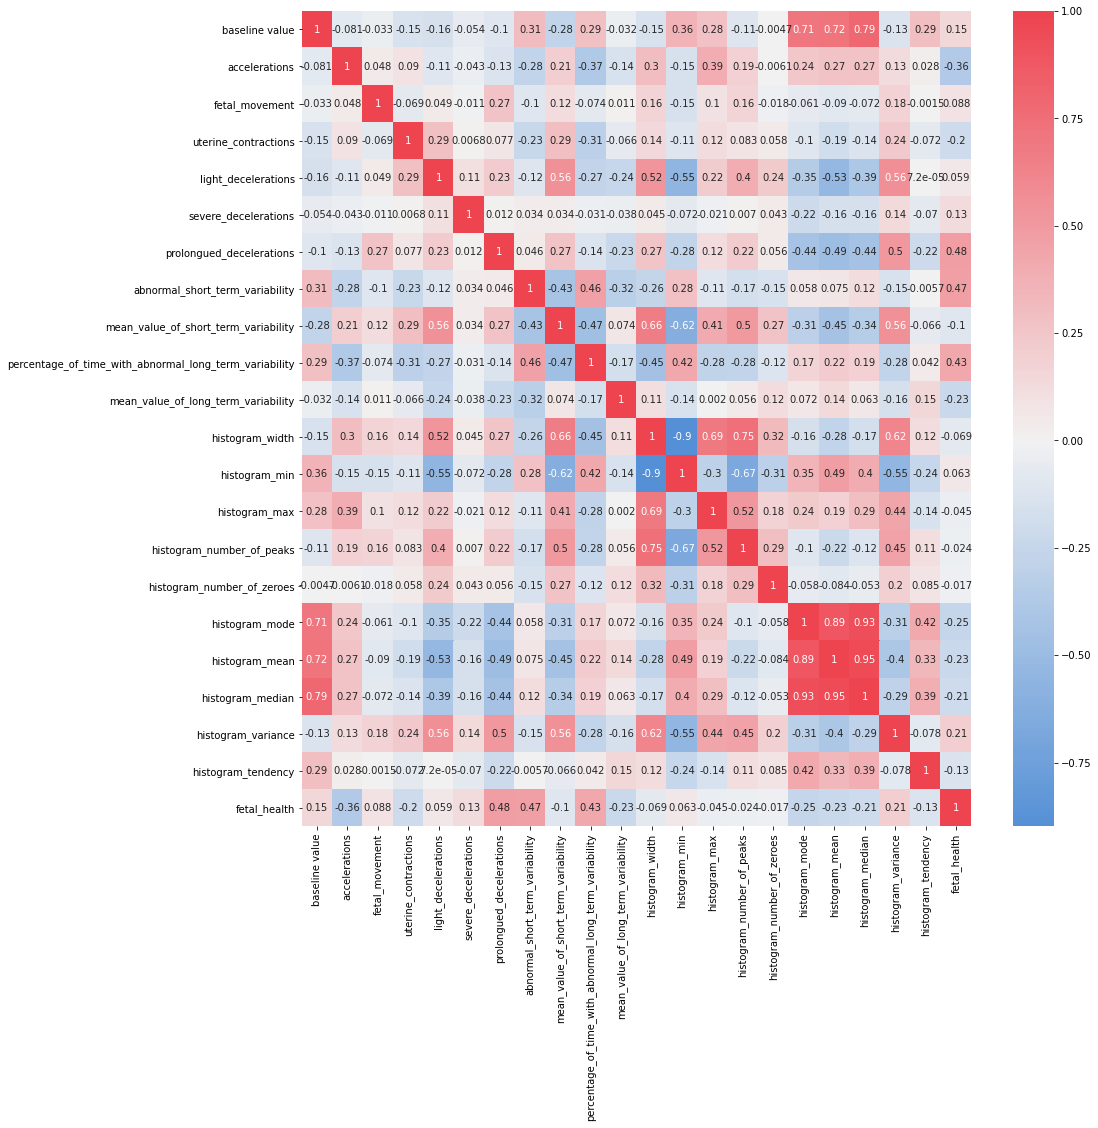

In [ ]:
#correlation matrix
corrmat= df.corr()
plot.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [ ]:
grp=df["fetal_health"].value_counts()
grp

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
grp1=df.copy()
grp1=pd.DataFrame(df.groupby("fetal_health")["uterine_contractions"].mean())
grp1.reset_index(inplace=True)
grp1

,fetal_health,uterine_contractions
0,1.0,0.004781
1,2.0,0.002390
2,3.0,0.003784


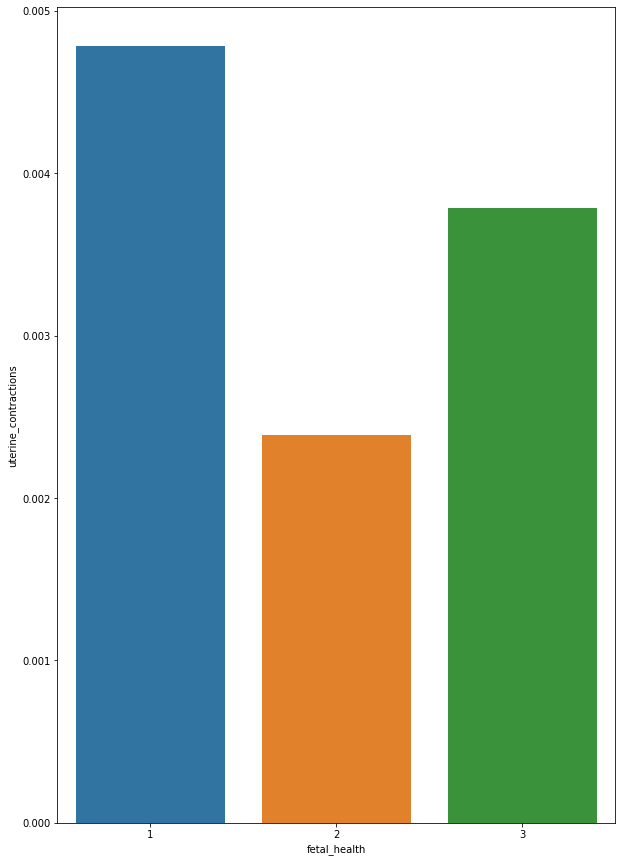

In [ ]:
plot.figure(figsize=(10,15))

sns.barplot(x='fetal_health',y='uterine_contractions',data=grp1)

In [ ]:
grp2=df.copy()
grp2=pd.DataFrame(df.groupby("fetal_health")["accelerations"].mean())
grp2.reset_index(inplace=True)
grp2

,fetal_health,accelerations
0,1,0.003992
1,2,0.000275
2,3,0.000392


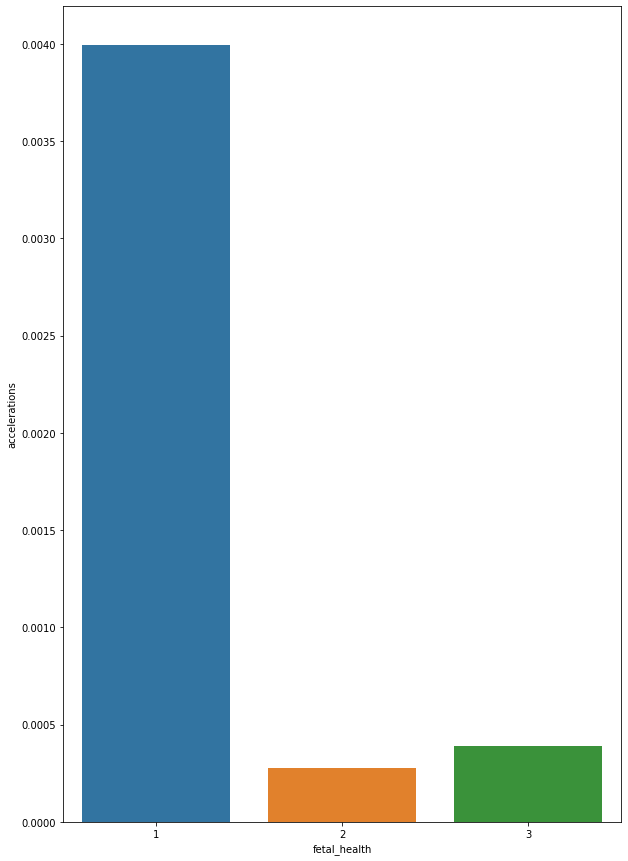

In [ ]:
plot.figure(figsize=(10,15))

sns.barplot(x='fetal_health',y='accelerations',data=grp2)

In [ ]:
grp3=df.copy()
grp3=pd.DataFrame(df.groupby("fetal_health")["fetal_movement"].mean())
grp3.reset_index(inplace=True)
grp3

,fetal_health,fetal_movement
0,1,0.007963
1,2,0.008332
2,3,0.025676


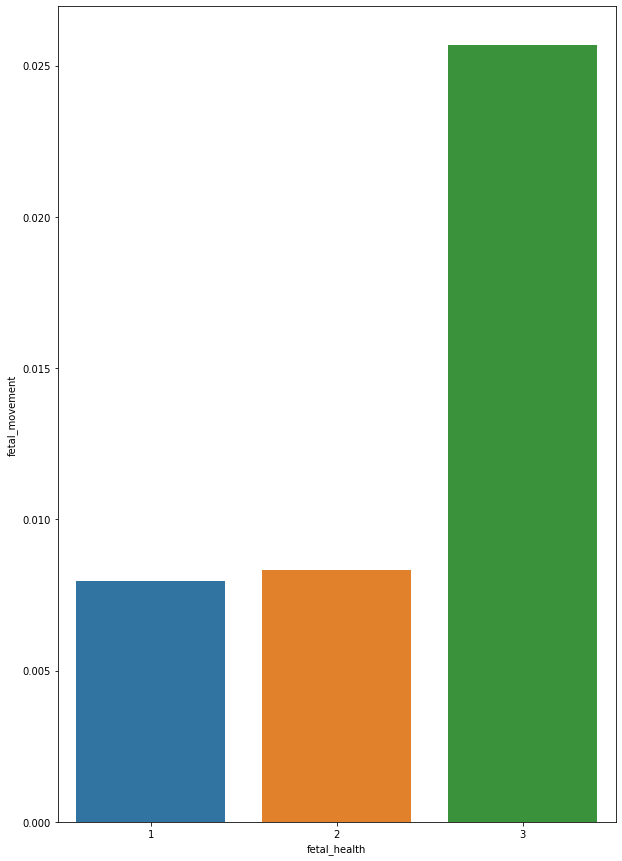

In [ ]:
plot.figure(figsize=(10,15))
sns.barplot(x="fetal_health",y="fetal_movement",data=grp3)

In [ ]:
grp4=df.copy()
grp4=pd.DataFrame(df.groupby("fetal_health")["baseline value"].mean())
grp4.reset_index(inplace=True)
grp4

,fetal_health,baseline value
0,1,131.981873
1,2,141.684746
2,3,131.687500


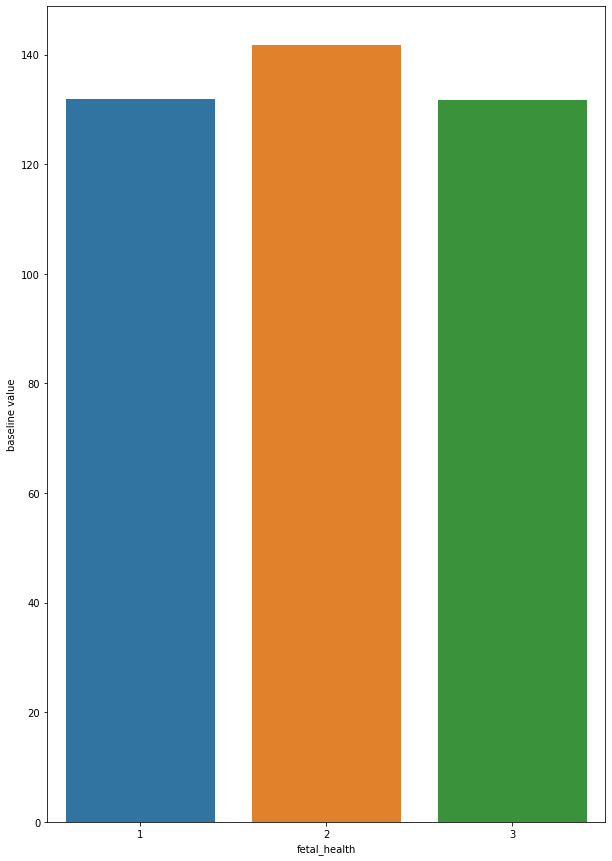

In [ ]:
plot.figure(figsize=(10,15))
sns.barplot(x="fetal_health",y="baseline value",data=grp4)

In [ ]:
grp5=df.copy()
grp5=pd.DataFrame(df.groupby("fetal_health")["histogram_width"].mean())
grp5.reset_index(inplace=True)
grp5

,fetal_health,histogram_width
0,1,73.400000
1,2,49.159322
2,3,78.346591


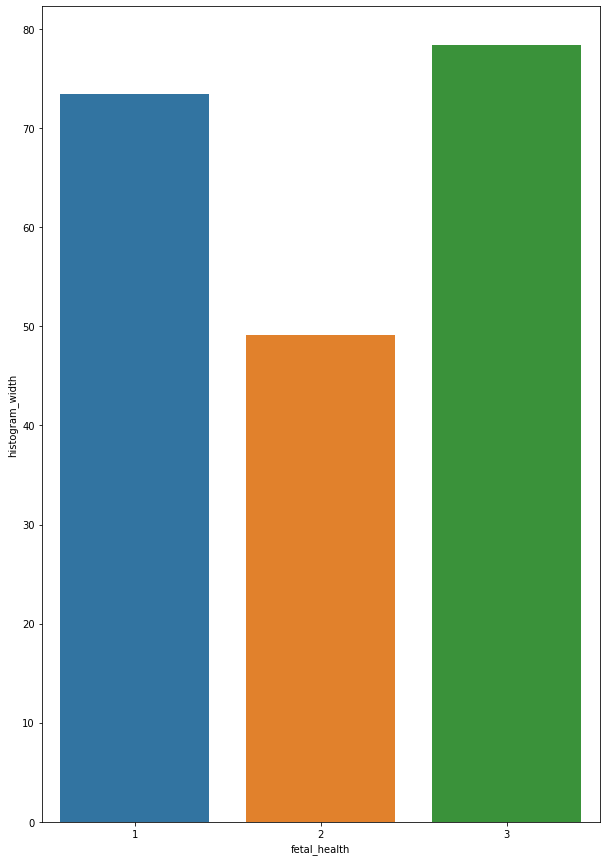

In [ ]:
plot.figure(figsize=(10,15))
sns.barplot(x="fetal_health",y="histogram_width",data=grp5)

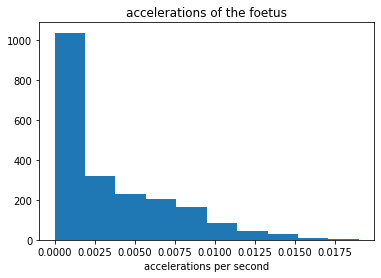

In [ ]:
x=df["accelerations"]
plot.title("accelerations of the foetus")
plot.xlabel("accelerations per second")
plot.hist(x)
plot.show()


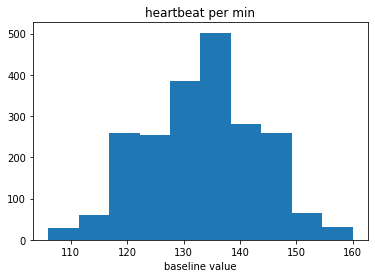

In [ ]:
x=df["baseline value"]
plot.title("heartbeat per min")
plot.xlabel("baseline value")
plot.hist(x)
plot.show()

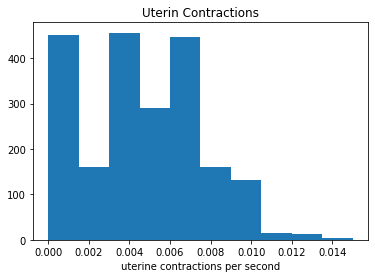

In [ ]:
x=df["uterine_contractions"]
plot.title("Uterin Contractions")
plot.xlabel("uterine contractions per second")
plot.hist(x)
plot.show()

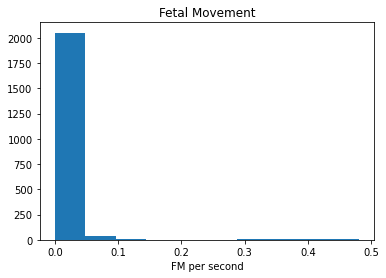

In [ ]:
x=df["fetal_movement"]
plot.title("Fetal Movement")
plot.xlabel("FM per second")
plot.hist(x)
plot.show()

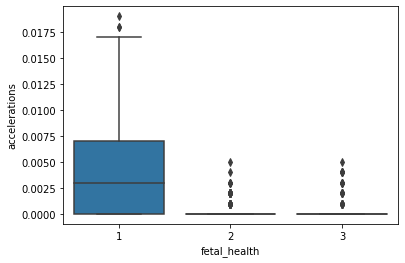

In [ ]:
AC=sns.boxplot(x="fetal_health",y="accelerations",data=df)

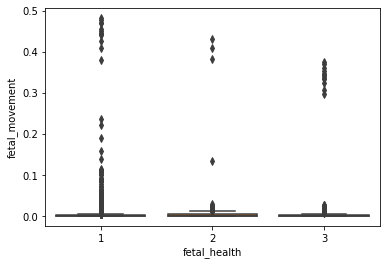

In [ ]:
FM=sns.boxplot(x="fetal_health",y="fetal_movement",data=df)

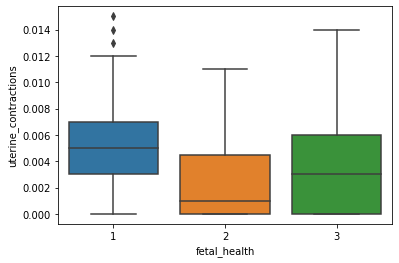

In [ ]:
UC=sns.boxplot(x="fetal_health",y="uterine_contractions",data=df)

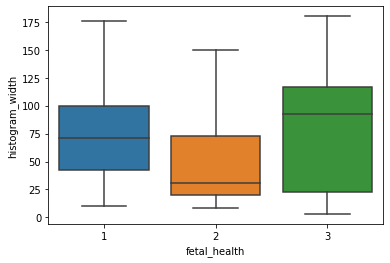

In [ ]:
HW=sns.boxplot(x="fetal_health",y="histogram_width",data=df)

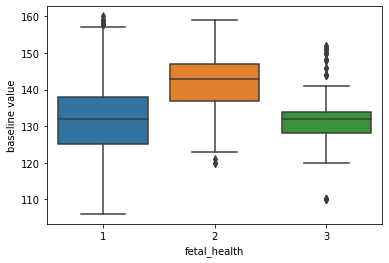

In [ ]:
beats=sns.boxplot(x="fetal_health",y="baseline value",data=df)

In [ ]:
Feature=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
Feature.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [ ]:
Target=df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=split(Feature,Target,test_size=0.4,random_state=12)

In [ ]:
M1=SVC(kernel="linear",random_state=0)

In [ ]:
M1.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred=M1.predict(x_test)


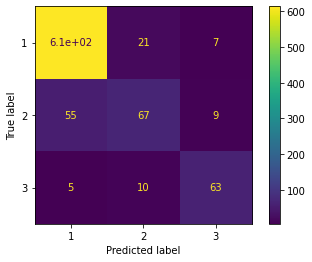

In [ ]:
matrix1=plot_confusion_matrix(M1,x_test,y_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.96      0.91      0.93       674
           2       0.51      0.68      0.59        98
           3       0.81      0.80      0.80        79

    accuracy                           0.87       851
   macro avg       0.76      0.80      0.77       851
weighted avg       0.89      0.87      0.88       851



In [ ]:
sc = StandardScaler()
scaled= sc.fit_transform(Feature)
Scaled=pd.DataFrame(scaled)
Scaled.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980
5,0.070757,-0.563635,-0.20321,1.912687,2.402604,-0.057476,3.122175,-1.221153,5.172188,-0.535361,-1.455081,2.042649,-1.474609,2.005277,0.316003,3.791490,-3.752237,-1.771050,-2.149617,5.218765,-0.524526
6,0.070757,-0.563635,-0.20321,2.931233,2.064711,-0.057476,4.817640,-1.046621,5.625172,-0.535361,-1.455081,2.042649,-1.474609,2.005277,0.655137,3.791490,-4.057535,-1.771050,-2.218758,6.772052,-0.524526
7,-1.148938,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,2.094965,-0.943095,-0.209142,1.317304,-0.062802,-1.068562,-1.896626,-1.379664,-0.458444,-0.943495,-0.808890,-1.043360,-0.545656,1.112980
8,-1.148938,-0.822388,-0.20321,-0.803434,-0.638438,-0.057476,-0.268754,2.153143,-0.943095,-0.263512,0.961870,-0.062802,-1.068562,-1.896626,-1.379664,-0.458444,-0.943495,-0.808890,-1.043360,-0.545656,1.112980
9,-1.148938,-0.822388,-0.20321,-0.463919,-0.638438,-0.057476,-0.268754,2.269498,-1.169587,-0.209142,0.428719,-0.062802,-1.068562,-1.896626,-1.040530,-0.458444,-0.943495,-0.808890,-1.043360,-0.614691,1.112980


In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe=RFE(M1,10)

In [ ]:
fit=rfe.fit(x_train,y_train)

In [ ]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [ True  True  True  True False False False False  True False False False
 False False  True  True False  True  True False  True]
Feature Ranking: [ 1  1  1  1  7 12 10  2  1  4  3 11  8  9  1  1  5  1  1  6  1]


[0.0520043  0.04696095 0.0262157  0.05431596 0.01797323 0.00226575
 0.07362789 0.11347784 0.06588713 0.12123494 0.0355747  0.03956073
 0.04208721 0.03106416 0.02681739 0.01237029 0.05374215 0.07352154
 0.05642614 0.03611723 0.01875475]


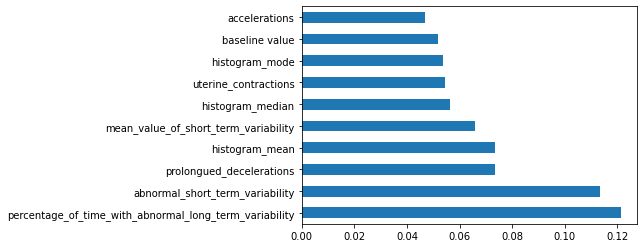

In [ ]:
X = df.iloc[:,0:21] 
y = df.iloc[:,-1]  
from sklearn.ensemble import ExtraTreesClassifier

M2 = ExtraTreesClassifier()
M2.fit(x_train,y_train)
print(M2.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(M2.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plot.show()

In [ ]:
F_imp=pd.DataFrame(feat_importances.sort_values(ascending=False))
F_imp.reset_index(inplace=True)
F_imp.columns=["Features","Scores"]
F_imp


,Features,Scores
0,percentage_of_time_with_abnormal_long_term_var...,0.121235
1,abnormal_short_term_variability,0.113478
2,prolongued_decelerations,0.073628
3,histogram_mean,0.073522
4,mean_value_of_short_term_variability,0.065887
5,histogram_median,0.056426
6,uterine_contractions,0.054316
7,histogram_mode,0.053742
8,baseline value,0.052004
9,accelerations,0.046961


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
M1.get_params()


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
params={"C":[0.1, 1, 10, 100],"gamma":[0.1,1,0.001,0.01],"kernel":["rbf","sigmoid","linear"]}

In [ ]:
M3=GridSearchCV(M1,params,refit=True,verbose=3)

In [ ]:
M3.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.796, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.796, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.796, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.792, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.792, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.796, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.796, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.796, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.792, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.792, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 15.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 0.001, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

###  From grid search CV we have got good scores when:
### c=1,100
### gamma=0.1,0.001
### kernel=linear,rbf

In [ ]:
Top_10=F_imp.copy()
Top_10.head(10)


,Features,Scores
0,percentage_of_time_with_abnormal_long_term_var...,0.126784
1,abnormal_short_term_variability,0.099319
2,prolongued_decelerations,0.070690
3,mean_value_of_short_term_variability,0.068739
4,histogram_mean,0.067054
5,uterine_contractions,0.065318
6,histogram_mode,0.062413
7,histogram_median,0.058425
8,accelerations,0.047990
9,baseline value,0.047437


In [ ]:
F1=Scaled.iloc[:,[9,7,6,17,8,18,1,3,16,0]]
F1.columns=['percentage_of_time_with_abnormal_long_term_variability','abnormal_short_term_variability','prolongued_decelerations','histogram_mean',
          'mean_value_of_short_term_variability','histogram_median','accelerations','uterine_contractions','histogram_mode','baseline value']
F1.head(10)

,percentage_of_time_with_abnormal_long_term_variability,abnormal_short_term_variability,prolongued_decelerations,histogram_mean,mean_value_of_short_term_variability,histogram_median,accelerations,uterine_contractions,histogram_mode,baseline value
0,1.802542,1.513190,-0.268754,0.153270,-0.943095,-1.181642,-0.822388,-1.482465,-1.065614,-1.352220
1,-0.535361,-1.744751,-0.268754,0.089126,0.868841,0.132038,0.730133,0.554627,0.216638,-0.132526
2,-0.535361,-1.802928,-0.268754,0.024982,0.868841,-0.006244,-0.046128,1.233657,0.216638,-0.030884
3,-0.535361,-1.802928,-0.268754,-0.039162,1.208579,-0.075385,-0.046128,1.233657,-0.027600,0.070757
4,-0.535361,-1.802928,-0.268754,0.089126,1.208579,-0.006244,0.988886,1.233657,-0.027600,-0.132526
5,-0.535361,-1.221153,3.122175,-1.771050,5.172188,-2.149617,-0.563635,1.912687,-3.752237,0.070757
6,-0.535361,-1.046621,4.817640,-1.771050,5.625172,-2.218758,-0.563635,2.931233,-4.057535,0.070757
7,-0.209142,2.094965,-0.268754,-0.808890,-0.943095,-1.043360,-0.822388,-1.482465,-0.943495,-1.148938
8,-0.263512,2.153143,-0.268754,-0.808890,-0.943095,-1.043360,-0.822388,-0.803434,-0.943495,-1.148938
9,-0.209142,2.269498,-0.268754,-0.808890,-1.169587,-1.043360,-0.822388,-0.463919,-0.943495,-1.148938


In [ ]:
Features=F1.copy()
Features.head

<bound method NDFrame.head of       percentage_of_time_with_abnormal_long_term_variability  ...  baseline value
0                                              1.802542       ...       -1.352220
1                                             -0.535361       ...       -0.132526
2                                             -0.535361       ...       -0.030884
3                                             -0.535361       ...        0.070757
4                                             -0.535361       ...       -0.132526
...                                                 ...       ...             ...
2121                                           0.823885       ...        0.680604
2122                                           0.660775       ...        0.680604
2123                                           0.552035       ...        0.680604
2124                                           0.932624       ...        0.680604
2125                                           1.421953       ...   

In [ ]:
Targets=df.iloc[:,-1]

In [ ]:
X_train, X_test, Y_train, Y_test =split(Features, Targets, test_size = 0.4, random_state = 12)

In [ ]:
Model1=SVC(C=1,gamma=0.1,kernel="linear",random_state=0)

In [ ]:
Model1.fit(X_train,Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_pred=Model1.predict(X_test)

In [ ]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           1       0.97      0.92      0.94       677
           2       0.60      0.69      0.64       113
           3       0.69      0.89      0.78        61

    accuracy                           0.88       851
   macro avg       0.75      0.83      0.79       851
weighted avg       0.90      0.88      0.89       851



In [ ]:
Model2=SVC(C=100,gamma=0.01,kernel='linear',random_state=0)

In [ ]:
Model2.fit(X_train,Y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_pred1=Model2.predict(X_test)

In [ ]:
print(classification_report(Y_pred1,Y_test))

              precision    recall  f1-score   support

           1       0.96      0.93      0.94       669
           2       0.59      0.68      0.63       113
           3       0.73      0.83      0.78        69

    accuracy                           0.88       851
   macro avg       0.76      0.81      0.78       851
weighted avg       0.90      0.88      0.89       851



In [ ]:
Model3=SVC(C=1,gamma=0.1,kernel='rbf',random_state=0)

In [ ]:
Model3.fit(X_train,Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_pred2=Model3.predict(X_test)

In [ ]:
print(classification_report(Y_pred2,Y_test))

              precision    recall  f1-score   support

           1       0.98      0.92      0.95       683
           2       0.63      0.75      0.68       110
           3       0.71      0.95      0.81        58

    accuracy                           0.90       851
   macro avg       0.77      0.87      0.81       851
weighted avg       0.92      0.90      0.91       851



In [ ]:
Model4=SVC(C=100,gamma=0.1,kernel='rbf',random_state=0)

In [ ]:
Model4.fit(X_train,Y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_pred3=Model4.predict(X_test)

In [ ]:
print(classification_report(Y_pred3,Y_test))

              precision    recall  f1-score   support

           1       0.96      0.95      0.95       649
           2       0.75      0.76      0.75       129
           3       0.87      0.93      0.90        73

    accuracy                           0.92       851
   macro avg       0.86      0.88      0.87       851
weighted avg       0.92      0.92      0.92       851



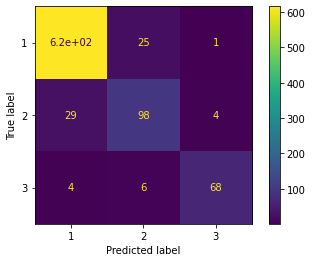

In [ ]:
matrix2=plot_confusion_matrix(Model4,X_test,Y_test)

In [ ]:
c=[0.1,1,10,100]


In [ ]:
Model5=[]

In [ ]:
for x in c:
Model=SVC(C=x,kernel='rbf',gamma=0.1)
Model.fit(X_train,Y_train)
Model5.append(Model)

In [ ]:
train_score=[x.score(X_train,Y_train) for x in Model5]


In [ ]:
test_score=[y.score(X_test,Y_test) for y in Model5]

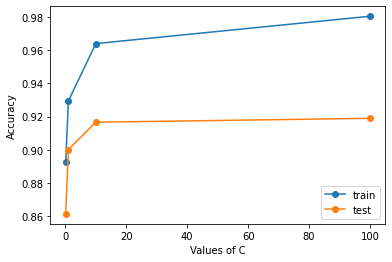

In [ ]:
plot.plot(c,train_score,marker='o')
plot.plot(c,test_score,marker='o')
plot.xlabel("Values of C")
plot.ylabel("Accuracy")
plot.legend(["train","test"])